In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
import folium


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/labels.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/labels.csv
/kaggle/input/description.md
/kaggle/input/GCP-Coupons-Instructions.rtf
/kaggle/input/sample_submission.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv
/kaggle/input/new-york-city-taxi-fare-prediction/description.md
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv.zip


In [3]:
# მონაცემების ჩატვირთვა
train_df =  pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000)
test_df =  pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')


In [4]:
test_df.shape


(9914, 7)

In [5]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-72.365437,39.854075,-72.355298,39.849902,1.701735
std,10.901230,6.325354,10.928248,6.338538,1.328327
min,-74.178068,-74.000425,-75.437730,-74.009507,0.000000
25%,-73.992274,40.734688,-73.991365,40.733664,1.000000
50%,-73.981978,40.752504,-73.980220,40.753209,1.000000
75%,-73.966718,40.767114,-73.963598,40.768143,2.000000
max,40.790297,41.366138,40.800715,41.056380,6.000000


In [6]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
train_df.shape


(10000, 8)

In [8]:
train_df.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [10]:
print(train_df.isnull().sum())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
# გადავყაროთ missing values, რადგან დატასეტის მცირე ნაწილს შეადგენენ
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))


Old size: 10000
New size: 10000


In [12]:
print(len(train_df[train_df.fare_amount > 100]))


3


In [13]:
# გადავყაროთ არადადებითი თანხები და 100 მეტი თანხები
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.fare_amount>0) & (train_df.fare_amount100)]
print('New size: %d' % len(train_df))


Old size: 10000


AttributeError: 'DataFrame' object has no attribute 'fare_amount100'

In [14]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [15]:
print(len(train_df[train_df.passenger_count > 6]))


0


In [16]:
print(len(train_df[train_df.passenger_count == 0]))


38


In [17]:
# გადავყაროთ 6-ზე მეტ მგზავრიანი მონაცემები

print('Old size: %d' % len(train_df))
old_len = len(train_df)
train_df = train_df[(train_df.passenger_count6) & (train_df.passenger_count>0)]
print(f'New size: {len(train_df)}, removed: {old_len - len(train_df)}')


Old size: 10000


AttributeError: 'DataFrame' object has no attribute 'passenger_count6'

In [18]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


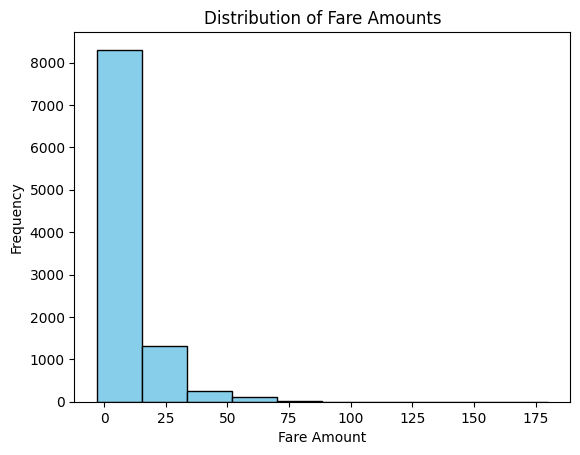

In [19]:
plt.hist(train_df['fare_amount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


In [20]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [21]:
# ტესტსეტის მიხედვით ვიპოვოთ ნიუ-იორკის მიახლოებითი კოორდინატები
# min_longitude = min(test_df['pickup_longitude'].min(), test_df['dropoff_longitude'].min())
# max_longitude = max(test_df['pickup_longitude'].max(), test_df['dropoff_longitude'].max())

# min_latitude = min(test_df['pickup_latitude'].min(), test_df['dropoff_latitude'].min())
# max_latitude = max(test_df['pickup_latitude'].max(), test_df['dropoff_latitude'].max())

# ნიუ იორკის მიახლოებითი კოორდინატები
min_longitude = -74.5
max_longitude = -72.8
min_latitude = 40.5
max_latitude = 41.8

#-74.5, -72.8, 40.5, 41.8

print("Minimum Longitude:", min_longitude)
print("Maximum Longitude:", max_longitude)
print("Minimum Latitude:", min_latitude)
print("Maximum Latitude:", max_latitude)


Minimum Longitude: -74.5
Maximum Longitude: -72.8
Minimum Latitude: 40.5
Maximum Latitude: 41.8


In [22]:
train_df = train_df[
    (train_df['pickup_longitude'] >= min_longitude) &
    (train_df['pickup_longitude']  max_longitude) &
    (train_df['pickup_latitude'] >= min_latitude) &
    (train_df['pickup_latitude']  max_latitude)
]

train_df = train_df[
    (train_df['dropoff_longitude'] >= min_longitude) &
    (train_df['dropoff_longitude']  max_longitude) &
    (train_df['dropoff_latitude'] >= min_latitude) &
    (train_df['dropoff_latitude']  max_latitude)
]

train_df.describe()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1088607145.py, line 3)

In [23]:
from geopy.distance import geodesic

from math import radians, sin, cos, sqrt, atan2

# დავითვალოთ მანძილები და დავამატოთ ახალი ფიჩერის სახით

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  
    
    return distance

distances = train_df.apply(lambda row: haversine_distance(
                                row['pickup_latitude'], row['pickup_longitude'],
                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

train_df['distance'] = distances

plt.hist(list(filter(lambda x: x  30, distances)), bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances between Pickup and Dropoff Locations')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2167969854.py, line 24)

In [24]:
train_df.distance.describe()


AttributeError: 'DataFrame' object has no attribute 'distance'

In [25]:
train_df['fare_per_km'] = train_df.distance/train_df.fare_amount
train_df.fare_per_km.describe()


AttributeError: 'DataFrame' object has no attribute 'distance'

In [26]:
train_df = train_df[(train_df['fare_per_km']  0.5) & (train_df['fare_per_km'] > 0)]
plt.hist(train_df['fare_per_km'], bins=10, color='skyblue', edgecolor='black')
plt.title('Fare per km distribuiton')
plt.xlabel('Fare per km')
plt.ylabel('Frequency')
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (813026562.py, line 1)

In [27]:
# დავამატოთ წელი, კვირის დღე და საათი ფიჩერებად
pickup_datetime = pd.to_datetime(train_df['pickup_datetime'])
train_df['year'] = pickup_datetime.apply(lambda t: t.year)
train_df['weekday'] = pickup_datetime.apply(lambda t: t.weekday())
train_df['hour'] = pickup_datetime.apply(lambda t: t.hour)


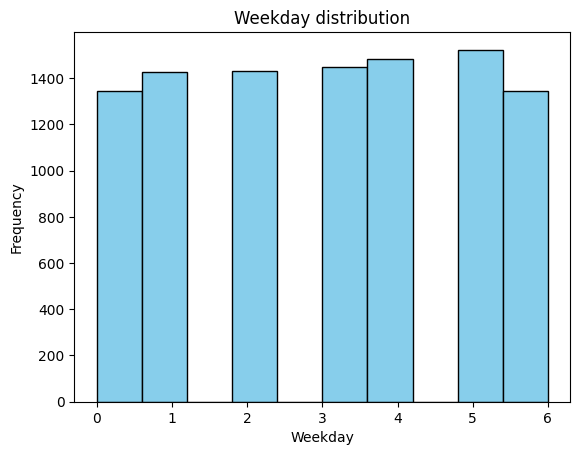

In [28]:
plt.hist(train_df['weekday'], bins=10, color='skyblue', edgecolor='black')
plt.title('Weekday distribution')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.show()


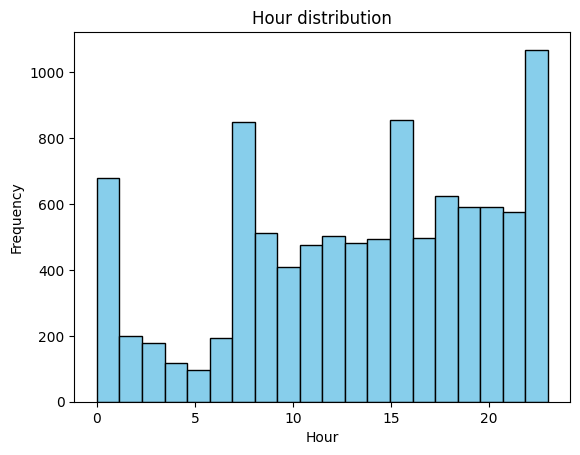

In [29]:
plt.hist(train_df['hour'], bins=20, color='skyblue', edgecolor='black')
plt.title('Hour distribution')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


In [30]:
hourly_fare_mean = train_df.groupby('hour')['fare_per_km'].mean()
print(hourly_fare_mean)


KeyError: 'Column not found: fare_per_km'

In [31]:
import matplotlib.pyplot as plt

# Example Series hourly_fare_mean containing mean fare amount for each hour
# Replace hourly_fare_mean with your actual Series

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_fare_mean.index, hourly_fare_mean.values, marker='o', linestyle='-')
plt.title('Mean Fare per km by Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Fare Amount')
plt.xticks(hourly_fare_mean.index)  # Ensure ticks are at each hour
plt.grid(True)
plt.show()


NameError: name 'hourly_fare_mean' is not defined

<Figure size 1000x600 with 0 Axes>

In [32]:
weekday_fare_mean = train_df.groupby('weekday')['fare_per_km'].mean()
import matplotlib.pyplot as plt

# Example Series hourly_fare_mean containing mean fare amount for each hour
# Replace hourly_fare_mean with your actual Series

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekday_fare_mean.index, weekday_fare_mean.values, marker='o', linestyle='-')
plt.title('Mean Fare per km by weekday')
plt.xlabel('Weekday')
plt.ylabel('Mean Fare Amount')
plt.xticks(weekday_fare_mean.index)  # Ensure ticks are at each hour
plt.grid(True)
plt.show()


KeyError: 'Column not found: fare_per_km'

In [33]:
yearly_fare_mean = train_df.groupby('year')['fare_per_km'].mean()
import matplotlib.pyplot as plt

# Example Series hourly_fare_mean containing mean fare amount for each hour
# Replace hourly_fare_mean with your actual Series

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_fare_mean.index, yearly_fare_mean.values, marker='o', linestyle='-')
plt.title('Mean Fare per km by year')
plt.xlabel('year')
plt.ylabel('Mean Fare Amount')
plt.xticks(yearly_fare_mean.index)  # Ensure ticks are at each hour
plt.grid(True)
plt.show()


KeyError: 'Column not found: fare_per_km'

In [34]:
train_df['high_fare_days'] = train_df['weekday'].isin([0, 6, 5]).astype(int)
train_df['low_fare_days'] = train_df['weekday'].isin([1, 2, 3, 4]).astype(int)

train_df['low_fare_hours'] = ((train_df['hour'] >= 8) & (train_df['hour']  19)).astype(int)
train_df['high_fare_hours'] = ((train_df['hour']  8) | (train_df['hour'] > 19)).astype(int)

train_df['high_fare_years'] = (train_df['year']  2012).astype(int)
train_df['low_fare_years'] = (train_df['year'] > 2012).astype(int)

train_df['monday'] = (train_df['weekday'] == 0).astype(int)
train_df['tuesday'] = (train_df['weekday'] == 1).astype(int)
train_df['wednesday'] = (train_df['weekday'] == 2).astype(int)
train_df['thursday'] = (train_df['weekday'] == 3).astype(int)
train_df['friday'] = (train_df['weekday'] == 4).astype(int)
train_df['saturday'] = (train_df['weekday'] == 5).astype(int)
train_df['sunday'] = (train_df['weekday'] == 6).astype(int)
train_df.describe()
print(train_df['sunday'].sum())
print(train_df['monday'].sum())
print(train_df['friday'].sum())
print(train_df['tuesday'].sum())
print(train_df['wednesday'].sum())
print(train_df['saturday'].sum())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3010229716.py, line 4)

In [35]:
distances = test_df.apply(lambda row: haversine_distance(
                                row['pickup_latitude'], row['pickup_longitude'],
                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

test_df['distance'] = distances
pickup_datetime = pd.to_datetime(test_df['pickup_datetime'])
print(pickup_datetime)
test_df['year'] = pickup_datetime.apply(lambda t: t.year)
test_df['weekday'] = pickup_datetime.apply(lambda t: t.weekday())
test_df['hour'] = pickup_datetime.apply(lambda t: t.hour)

test_df['high_fare_days'] = test_df['weekday'].isin([0, 6, 5]).astype(int)
test_df['low_fare_days'] = test_df['weekday'].isin([1, 2, 3, 4]).astype(int)

test_df['low_fare_hours'] = ((test_df['hour'] >= 8) & (test_df['hour']  19)).astype(int)
test_df['high_fare_hours'] = ((test_df['hour']  8) | (test_df['hour'] > 19)).astype(int)

test_df['high_fare_years'] = (test_df['year']  2012).astype(int)
test_df['low_fare_years'] = (test_df['year'] > 2012).astype(int)

test_df['monday'] = (test_df['weekday'] == 0).astype(int)
test_df['tuesday'] = (test_df['weekday'] == 1).astype(int)
test_df['wednesday'] = (test_df['weekday'] == 2).astype(int)
test_df['thursday'] = (test_df['weekday'] == 3).astype(int)
test_df['friday'] = (test_df['weekday'] == 4).astype(int)
test_df['saturday'] = (test_df['weekday'] == 5).astype(int)
test_df['sunday'] = (test_df['weekday'] == 6).astype(int)
test_df.describe()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3188538520.py, line 15)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_df[[
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "passenger_count",
    "distance",
    "year",
#    "weekday",
    "hour",
    "monday",
    "tuesday",
    "wednesday",
    "thursday",
    "friday",
    "saturday",
    "sunday",
    "high_fare_days",
    "low_fare_days",
    "high_fare_years",
    "low_fare_years",
    "high_fare_hours",
    "low_fare_hours",
]]

y = train_df["fare_amount"]

X_test = test_df.drop(columns=["key", "pickup_datetime"])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_valid = model.predict(X_valid)

# Evaluate model performance on validation data
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)
print("Mean Squared Error on Validation Data:", rmse_valid)

# Make predictions on the test data
#y_pred_test = model.predict(X_test)

# # Evaluate model performance on test data (optional)
#rmse_test = mean_squared_error(y_test, y_pred_test)
#print("Mean Squared Error on Test Data:", rmse_test)


KeyError: "['distance', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'high_fare_days', 'low_fare_days', 'high_fare_years', 'low_fare_years', 'high_fare_hours', 'low_fare_hours'] not in index"

In [37]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# X = train_df.drop(columns=["key", "fare_amount", "pickup_datetime", "fare_per_km"])

# y = train_df["fare_amount"]

# X_test = test_df.drop(columns=["key", "pickup_datetime"])
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

# # Instantiate the linear regression model
# model = LinearRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the validation data
# y_pred_valid = model.predict(X_valid)

# # Evaluate model performance on validation data
# rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared = False)
# print("Mean Squared Error on Validation Data:", rmse_valid)


In [38]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
#     "distance",
#     "year",
#     "weekday",
#     "hour",
#     "monday",
#     "tuesday",
#     "wednesday",
#     "thursday",
#     "friday",
#     "saturday",
#     "sunday",
#     "high_fare_days",
#     "high_fare_years",
#     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 5,
#     "eta": 0.1
# }

# num_rounds = 500 
# model = xgb.train(params, dtrain, num_rounds, evals=[(dvalid, "Validation")], early_stopping_rounds=10, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [39]:
# import xgboost as xgb        
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
# #     "distance",
# #     "year",
# #     "weekday",
# #     "hour",
# #     "monday",
# #     "tuesday",
# #     "wednesday",
# #     "thursday",
# #     "friday",
# #     "saturday",
# #     "sunday",
# #     "high_fare_days",
# #     "high_fare_years",
# #     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 6,
#     "eta": 0.1
# }

# n_estimators = 500 
# model = xgb.train(params, dtrain, n_estimators, evals=[(dvalid, "Validation")], early_stopping_rounds=5, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [40]:
# import xgboost as xgb        
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
#     "distance",
#     "year",
#     "weekday",
#     "hour",
# #     "monday",
# #     "tuesday",
# #     "wednesday",
# #     "thursday",
# #     "friday",
# #     "saturday",
# #     "sunday",
# #     "high_fare_days",
# #     "high_fare_years",
# #     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 6,
#     "eta": 0.1
# }

# n_estimators = 500 
# model = xgb.train(params, dtrain, n_estimators, evals=[(dvalid, "Validation")], early_stopping_rounds=5, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [41]:
# import xgboost as xgb        
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
#     "distance",
#     "year",
# #    "weekday",
#     "hour",
#     "monday",
#     "tuesday",
#     "wednesday",
#     "thursday",
#     "friday",
#     "saturday",
#     "sunday",
# #     "high_fare_days",
# #     "high_fare_years",
# #     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 6,
#     "eta": 0.1
# }

# n_estimators = 500 
# model = xgb.train(params, dtrain, n_estimators, evals=[(dvalid, "Validation")], early_stopping_rounds=5, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [42]:
# import xgboost as xgb        
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
#     "distance",
#     "year",
# #    "weekday",
#     "hour",
#     "monday",
#     "tuesday",
#     "wednesday",
#     "thursday",
#     "friday",
#     "saturday",
#     "sunday",
# #     "high_fare_days",
# #     "high_fare_years",
# #     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 6,
#     "eta": 0.01
# }

# n_estimators = 1000 
# model = xgb.train(params, dtrain, n_estimators, evals=[(dvalid, "Validation")], early_stopping_rounds=5, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [43]:
# import xgboost as xgb        
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = train_df[[
#     "pickup_longitude",
#     "pickup_latitude",
#     "dropoff_longitude",
#     "dropoff_latitude",
#     "passenger_count",
#     "distance",
#     "year",
# #    "weekday",
#     "hour",
#     "monday",
#     "tuesday",
#     "wednesday",
#     "thursday",
#     "friday",
#     "saturday",
#     "sunday",
#     "high_fare_days",
#     "low_fare_days",
#     "high_fare_years",
#     "low_fare_years",
#     "high_fare_hours",
#     "low_fare_hours",
# ]]

# y = train_df["fare_amount"]

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, shuffle=True)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_valid, label=y_valid)

# params = {
#     "objective": "reg:squarederror",  
#     "eval_metric": "rmse",             
#     "random_state": 42,
#     'max_depth': 6,
#     "eta": 0.1
# }

# n_estimators = 500 
# model = xgb.train(params, dtrain, n_estimators, evals=[(dvalid, "Validation")], early_stopping_rounds=5, verbose_eval=True)

# y_pred = model.predict(dvalid)

# rmse = mean_squared_error(y_valid, y_pred, squared = False)
# print("Mean Squared Error on Validation Set:", rmse)


In [44]:
X_test = test_df[[
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "passenger_count",
    "distance",
    "year",
#    "weekday",
    "hour",
    "monday",
    "tuesday",
    "wednesday",
    "thursday",
    "friday",
    "saturday",
    "sunday",
    "high_fare_days",
    "low_fare_days",
    "high_fare_years",
    "low_fare_years",
    "high_fare_hours",
    "low_fare_hours",
]]

#dtest = xgb.DMatrix(X_test)
# Make predictions on the test data
y_pred_test = model.predict(X_test)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': y_pred_test},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))


KeyError: "['distance', 'year', 'hour', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'high_fare_days', 'low_fare_days', 'high_fare_years', 'low_fare_years', 'high_fare_hours', 'low_fare_hours'] not in index"